In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob


In [3]:
apps = pd.read_csv("/content/apps.csv")
reviews = pd.read_csv("/content/user_reviews.csv")

apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
apps.dropna(inplace=True)


In [5]:
apps['Installs'] = apps['Installs'].str.replace('+','')
apps['Installs'] = apps['Installs'].str.replace(',','')
apps['Installs'] = apps['Installs'].astype(int)

apps['Price'] = apps['Price'].str.replace('$','')
apps['Price'] = apps['Price'].astype(float)

apps['Reviews'] = apps['Reviews'].astype(int)


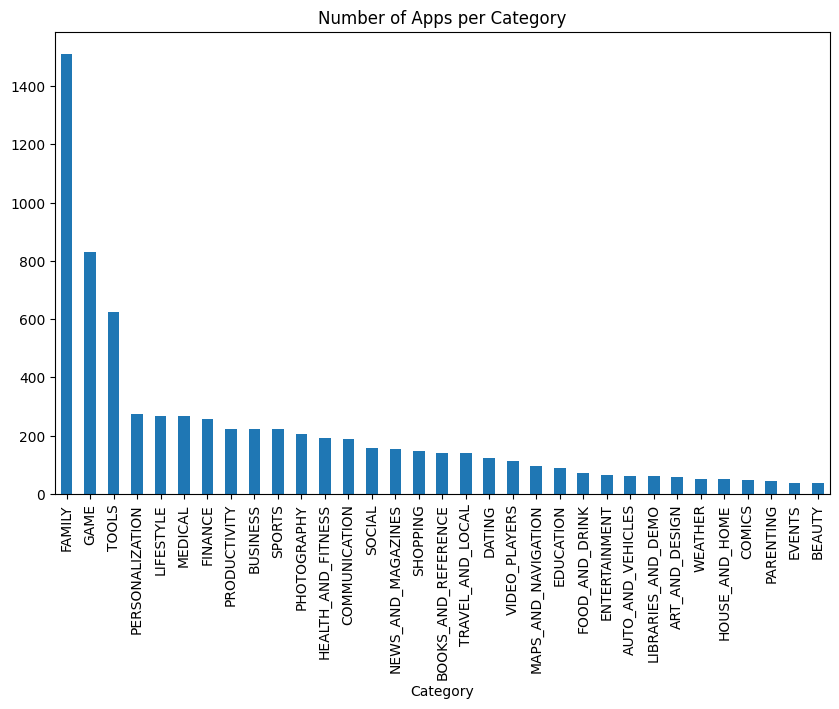

In [6]:
plt.figure(figsize=(10,6))
apps['Category'].value_counts().plot(kind='bar')
plt.title("Number of Apps per Category")
plt.show()


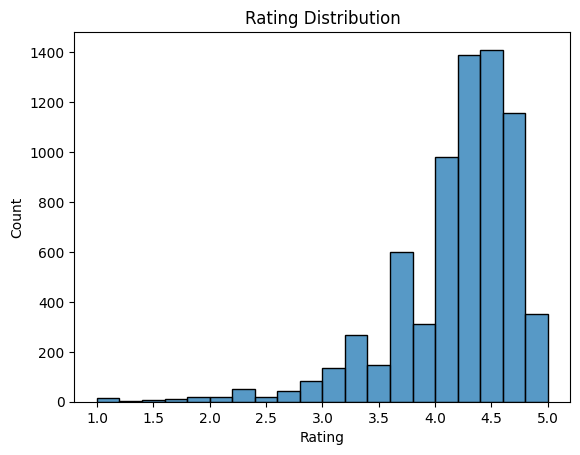

In [7]:
sns.histplot(apps['Rating'], bins=20)
plt.title("Rating Distribution")
plt.show()


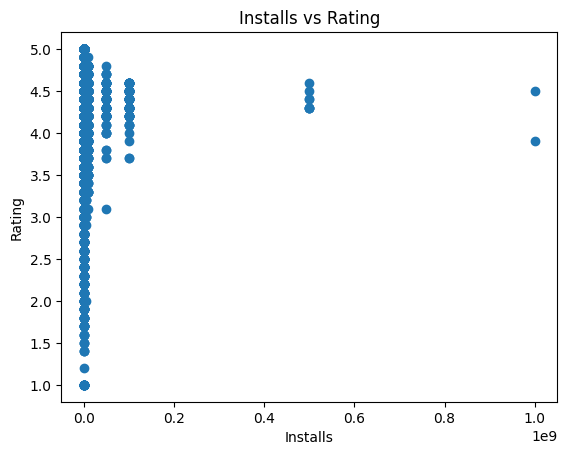

In [8]:
plt.scatter(apps['Installs'], apps['Rating'])
plt.xlabel("Installs")
plt.ylabel("Rating")
plt.title("Installs vs Rating")
plt.show()


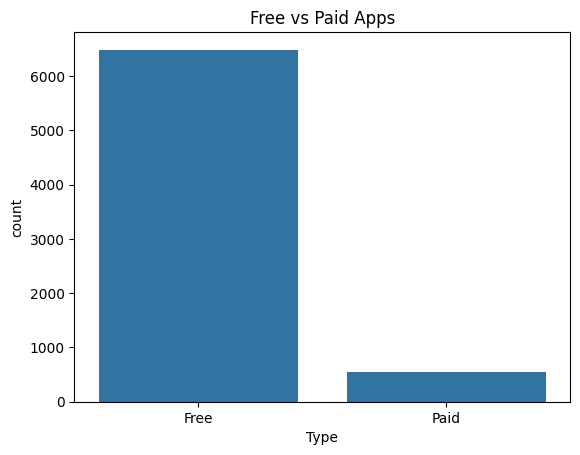

In [9]:
sns.countplot(x='Type', data=apps)
plt.title("Free vs Paid Apps")
plt.show()


In [10]:
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

reviews['Sentiment_Score'] = reviews['Translated_Review'].apply(get_sentiment)


In [11]:
reviews['Sentiment_Label'] = reviews['Sentiment_Score'].apply(
    lambda x: 'Positive' if x>0 else ('Negative' if x<0 else 'Neutral')
)


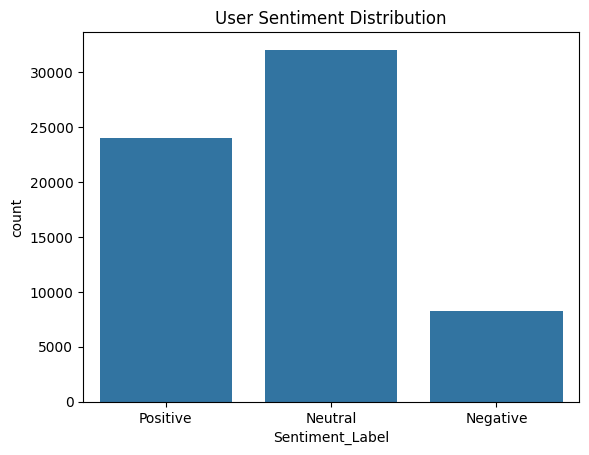

In [12]:
sns.countplot(x='Sentiment_Label', data=reviews)
plt.title("User Sentiment Distribution")
plt.show()


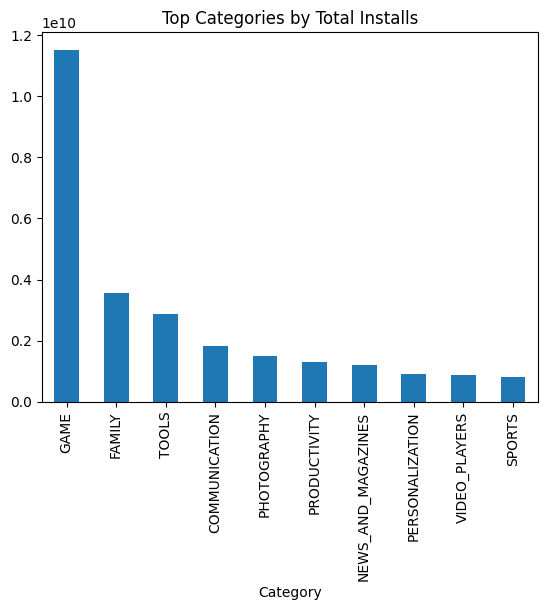

In [13]:
top_categories = apps.groupby('Category')['Installs'].sum().sort_values(ascending=False)

top_categories.head(10).plot(kind='bar')
plt.title("Top Categories by Total Installs")
plt.show()
